 ## AVIATION RISK ANALYSIS

 ## INTRODUCTION
The company wants to start working with airplanes but needs to know which ones are the safest.  

In this project, I will look at accident data from 1962–2023.  
The goal is to find the lowest-risk aircraft and give 3 clear recommendations to help the business decide which planes to buy.


 ## BUSINESS UNDERSTANDING
 
 ## WHO'S THIS FOR?  
The Head of the Aviation Division.  

 ## WHAT DOES THE BUSINESS NEED? 
They want to know which aircraft are safest to buy.  

Key Questions:  
1. Which aircraft types have the fewest accidents?  
2. How have accidents changed over time?  
3. Are private or commercial aircraft safer?  


## DATA UNDERSTANDING

The dataset comes from the National Transportation Safety Board (NTSB).  
It covers aviation accidents from 1962 to 2023.  

 ## WHAT WILL I DO HERE:
- Load the dataset into Python.  
- Look at the first few rows to see what it looks like.  
- Check the number of rows, columns, and missing values.  
- Find the most important columns for our analysis (like aircraft type, purpose, fatalities, and damage).  


## LOAD DATASET AND INSPECT AND UNDERSTAND THE DATA
Here we will load the dataset into a DataFrame,  
look at the first rows, and check the shape and basic info.


In [401]:
import pandas as pd

# load the dataset and assign it to tb 
tb = pd.read_csv('aviation-accident-data-2023-05-16.csv')

# print the first 5 rows of the aviation dataset 
tb.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [402]:
# let's check the shape of the dataset (rows,columns)
tb.shape
# we can confirm that we have 23967 rows and 9 columns in the  aviation dataset

(23967, 9)

In [403]:
# let's check the data types and column names
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [404]:
# we can confirm that we have 9 colums with 23967 rows but some columns have missing values or duplicate values thus leading to the uneven number in some columns

## DATA CLEANING

Now we will check for missing values and clean the data.  
Steps:
- Count missing values in each column  
- Decide which columns to drop or fix  
- Rename columns for easy readability and understanding  


In [405]:
# we'll start by counting missing values
tb.isnull().sum()

date               0
type               0
registration    1548
operator           4
fatalities      3938
location         948
country            0
cat                0
year               0
dtype: int64

we can identify that 4 columns have missing values but for easier readability we'll arrange them in descending order

In [406]:
# arrange them in descending order
tb.isnull().sum().sort_values(ascending=False)

fatalities      3938
registration    1548
location         948
operator           4
date               0
type               0
country            0
cat                0
year               0
dtype: int64

In [407]:
# now let's check for duplicate values
tb.duplicated().sum()

np.int64(115)

we can confirm that we have 115 duplicates in our aviation dataset now we'll rename the columns for easier understanding and readability

## RENAME COLUMNS

The current column names are confusing and not detailed .  
We will rename them to be easier to read and clean and analyze.


In [408]:
# renaming the columns too be user friendly and easily understandable

tb = tb.rename(columns={
     "date": "Date of Accident",
    "type": "Aircraft Type",
    "registration": "Aircraft Registration",
    "operator": "Operator",
    "fatalities": "Deaths",
    "location": "Location",
    "country": "Country",
    "cat": "Category",
    "year": "Year"
})

In [409]:
# let's check whether the columns changed 

tb.head(5)

,Date of Accident,Aircraft Type,Aircraft Registration,Operator,Deaths,Location,Country,Category,Year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


## Clean and Change Data Types and  Replace Missing Values

We will:
- Change Year and Fatalities to numbers  
- Replace missing values in Registration, Operator, and Location with "Unknown"  
- Replace missing Fatalities with 0  


In [410]:
# convert data types first
tb['Year'] = pd.to_numeric(tb['Year'], errors='coerce')
tb['Deaths'] = pd.to_numeric(tb['Deaths'], errors='coerce').fillna(0)



In [411]:
# Now let's fill in the missing values with data using fillna() method

tb['Location']=tb['Location'].fillna('Not Reported')
tb['Operator']=tb['Operator'].fillna('Not Reported')
tb['Aircraft Registration']=tb['Aircraft Registration'].fillna('Not Reported')




In [412]:
# let's check whether the missing values are filled
tb.isnull().sum()

Date of Accident          0
Aircraft Type             0
Aircraft Registration     0
Operator                  0
Deaths                    0
Location                  0
Country                   0
Category                  0
Year                     61
dtype: int64

### Handling Missing Data

Some columns had missing values (like Operator,Aircraft Registration, and Location).  
Instead of leaving them empty, we replaced them with **"Not Reported"**.  
This makes the dataset easier to read,analyze and avoids problems when  plotting data.  

For the **Deaths** column, missing values were filled with **0** since no number was reported.


### Dropping Rows with Missing Year

The **Year** column is very crucial for our analysis and business moves moving forward.  
Rows without a valid year don't add  any useful insights and can cause problems when plotting or making crucial business decisions.  

To keep the dataset clean and valid, we will **drop rows where Year is missing**.


In [413]:
# dropping invalid Year rows
tb = tb.dropna(subset=['Year'])

# let's confirm the outcome 
tb.isnull().sum()

Date of Accident         0
Aircraft Type            0
Aircraft Registration    0
Operator                 0
Deaths                   0
Location                 0
Country                  0
Category                 0
Year                     0
dtype: int64

In [414]:
# let's check if there's any inconsitency across all  the columns now
tb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23906 entries, 61 to 23966
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date of Accident       23906 non-null  object 
 1   Aircraft Type          23906 non-null  object 
 2   Aircraft Registration  23906 non-null  object 
 3   Operator               23906 non-null  object 
 4   Deaths                 23906 non-null  float64
 5   Location               23906 non-null  object 
 6   Country                23906 non-null  object 
 7   Category               23906 non-null  object 
 8   Year                   23906 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.8+ MB


## FIXING DATATYPES
### Converting Date Column

The **Date of Accident** column is recognized as object.  
To make it useful for analysis ,  
we need to convert it into a proper **datetime** format.  

This will let us easily explore accidents over time.


In [415]:
# converting the date of accident to datetime format
tb['Date of Accident']= pd.to_datetime(tb['Date of Accident'], errors='coerce')

/tmp/ipykernel_7962/2435219516.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tb['Date of Accident']= pd.to_datetime(tb['Date of Accident'], errors='coerce')


In [416]:
# let's confirm whether it changed
tb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23906 entries, 61 to 23966
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date of Accident       23408 non-null  datetime64[ns]
 1   Aircraft Type          23906 non-null  object        
 2   Aircraft Registration  23906 non-null  object        
 3   Operator               23906 non-null  object        
 4   Deaths                 23906 non-null  float64       
 5   Location               23906 non-null  object        
 6   Country                23906 non-null  object        
 7   Category               23906 non-null  object        
 8   Year                   23906 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 1.8+ MB


In [417]:
# let's convert Year to integer since years are numbers instead of float for good measures
tb['Year'] = tb['Year'].astype(int)

In [418]:
# let's confirm whether it changed
tb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23906 entries, 61 to 23966
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date of Accident       23408 non-null  datetime64[ns]
 1   Aircraft Type          23906 non-null  object        
 2   Aircraft Registration  23906 non-null  object        
 3   Operator               23906 non-null  object        
 4   Deaths                 23906 non-null  float64       
 5   Location               23906 non-null  object        
 6   Country                23906 non-null  object        
 7   Category               23906 non-null  object        
 8   Year                   23906 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.8+ MB


In [419]:
# let's drop inconsistent missing values in Date of accident
tb = tb.dropna(subset=['Date of Accident'])
tb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23408 entries, 61 to 23966
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date of Accident       23408 non-null  datetime64[ns]
 1   Aircraft Type          23408 non-null  object        
 2   Aircraft Registration  23408 non-null  object        
 3   Operator               23408 non-null  object        
 4   Deaths                 23408 non-null  float64       
 5   Location               23408 non-null  object        
 6   Country                23408 non-null  object        
 7   Category               23408 non-null  object        
 8   Year                   23408 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.8+ MB


### Removing Duplicates

Sometimes accident records are repeated in the dataset.  
We will check for duplicate rows and remove them to make  
sure our data is clean and accurate.


In [420]:
# let's check if the duplicates exist
tb.duplicated().sum()

np.int64(106)

In [421]:
# let's remove the duplicates and check again
tb = tb.drop_duplicates()
tb.duplicated().sum()

np.int64(0)

In [422]:
# let's check the shape of the dataset  after the dropping(rows,columns)
tb.shape

(23302, 9)

In [423]:
#  let's double check everything again after cleaning
tb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23302 entries, 61 to 23966
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date of Accident       23302 non-null  datetime64[ns]
 1   Aircraft Type          23302 non-null  object        
 2   Aircraft Registration  23302 non-null  object        
 3   Operator               23302 non-null  object        
 4   Deaths                 23302 non-null  float64       
 5   Location               23302 non-null  object        
 6   Country                23302 non-null  object        
 7   Category               23302 non-null  object        
 8   Year                   23302 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.8+ MB


### Standardizing Text Columns

Some text fields (like Operator, Country, Category)  
may have different formats (extra spaces, upper/lower case).  
We will standardize them by trimming spaces and making  
everything lowercase for consistency.


In [424]:
# let's strip the  extra spaces and convert them to lowercase
text_cols = ['Operator', 'Country', 'Category', 'Aircraft Type', 'Location']

for col in text_cols:
    tb[col] = tb[col].str.strip().str.lower()

In [425]:
# let's check whether the changes worked
tb['Operator'].unique()


array(['caproni', 'raf', 'handley page transport', ..., 'flytec sa',
       'angkasa super services', 'nasional global aviasi'], dtype=object)

### Checking for Outliers

Outliers are values that are very different from most of the data.  
They can affect our analysis and make results misleading.  

We will check for outliers in the **Deaths** column because it is the most important risk factor for accidents.  
We will first look at summary statistics, then use a boxplot to visualize any extreme values.  


In [426]:
# let's check the summary first

tb['Deaths'].describe()

count    23302.000000
mean         5.178912
std         17.314572
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max        520.000000
Name: Deaths, dtype: float64

### Visualizing Outliers in Deaths

Now that we have seen the summary statistics,  
we will use a boxplot to check for outliers in the **Deaths** column.  

A boxplot will help us see the common range of deaths in most accidents  
and highlight extreme accidents with very high numbers of deaths.  


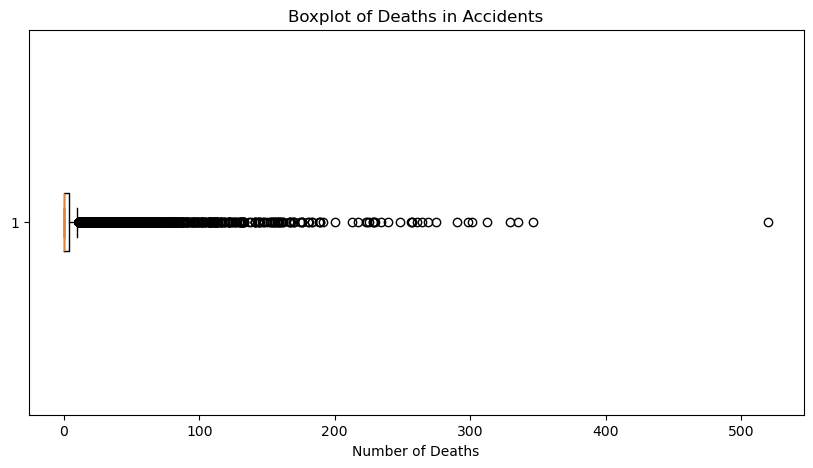

In [427]:
# let's visualize the out;iers so that we can see it on 3d
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.boxplot(tb['Deaths'], vert=False)
plt.title("Boxplot of Deaths in Accidents")
plt.xlabel("Number of Deaths")
plt.show()


### VISUALIZATION AND ANALYSIS

### Accidents Over Time
Now we will visualize the trend of accidents over the years to see if they are increasing or decreasing.


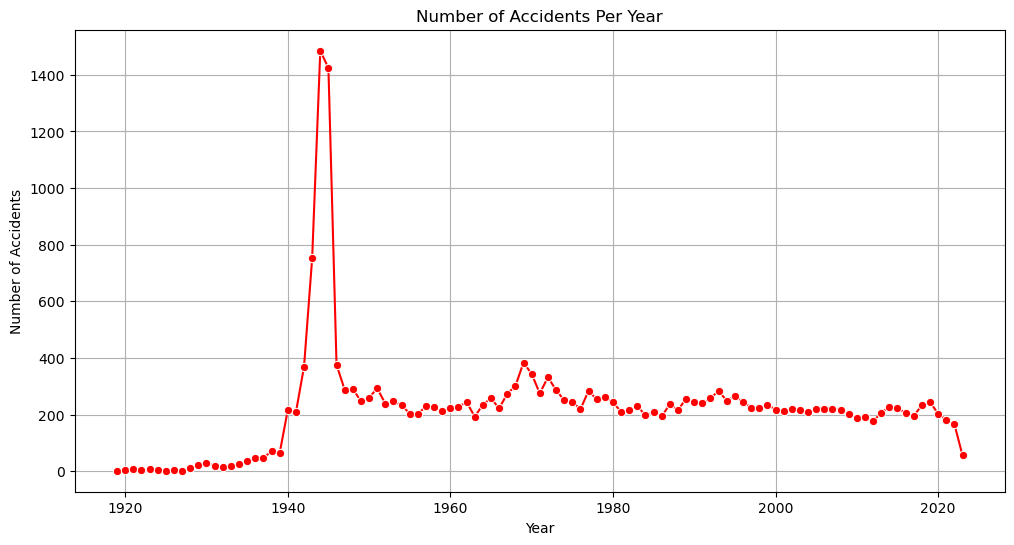

In [428]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accidents per Year
accidents_per_year = tb.groupby("Year").size()

plt.figure(figsize=(12,6))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values, marker="o",color="red")
plt.title("Number of Accidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()


### Accident Analysis Over Time
We can note from the graph that accidents have been on a constant decline after an unexpected spike between the year 1940-1960 thus we can deduce that the measures taken over time  to reduce the number of accidents has worked thus leading to a steady decline as of the modern years of 2020-

### Further Analysis
Now we look at deaths per year, operators with most accidents, countries with most accidents, and aircraft types with most accidents.


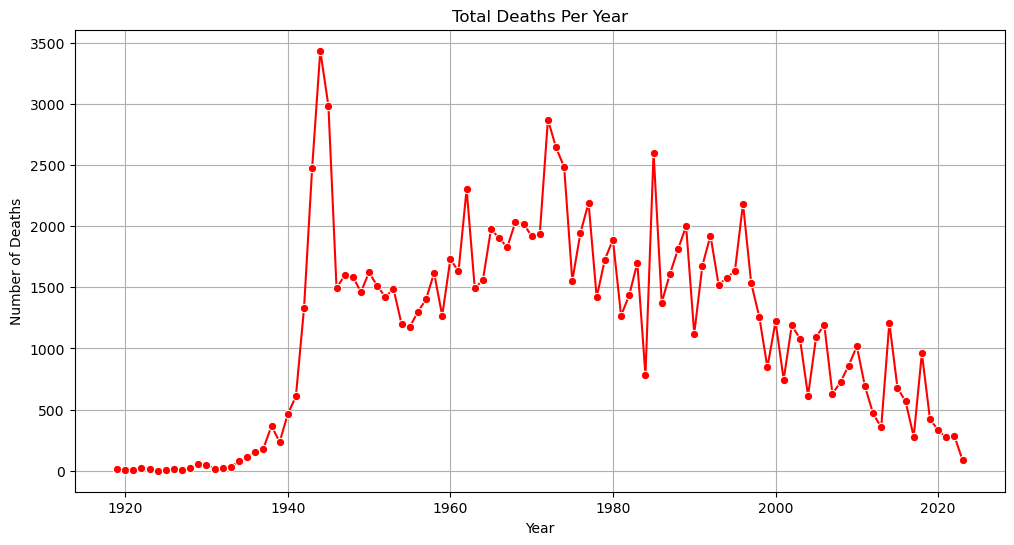

In [429]:
# Total deaths per year
deaths_per_year = tb.groupby("Year")["Deaths"].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=deaths_per_year.index, y=deaths_per_year.values, marker="o", color="red")
plt.title("Total Deaths Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.grid(True)
plt.show()


#### Death Analysis
Even though it's sad to lose lives we can note that there's been a rather up and down decline in the number of deaths experienced over time which leads us to a conclusion whereby the measures taken in the aviation division seem to be working cause from 2000-2020 the deaths were far fewer compared to 1940-1960

### Operators with Most Accidents
We will check which operators (airlines/organizations) have recorded the highest number of accidents.


/tmp/ipykernel_7962/909625784.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_operators.values, y=top_operators.index, palette="magma")


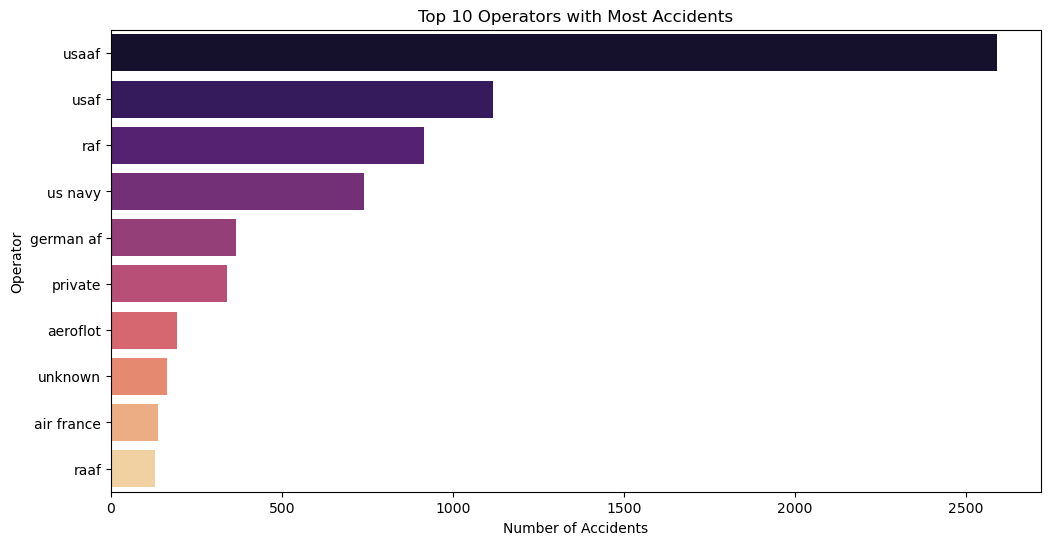

In [430]:
# Top 10 operators by accident count
top_operators = tb["Operator"].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_operators.values, y=top_operators.index, palette="magma")
plt.title("Top 10 Operators with Most Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Operator")
plt.show()


### Operators With The Least Accidents
Here we will try to find the operators who have been in the least number of accidents which answers our business question

/tmp/ipykernel_7962/1545532047.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_operators.values, y=top_operators.index, palette="magma")


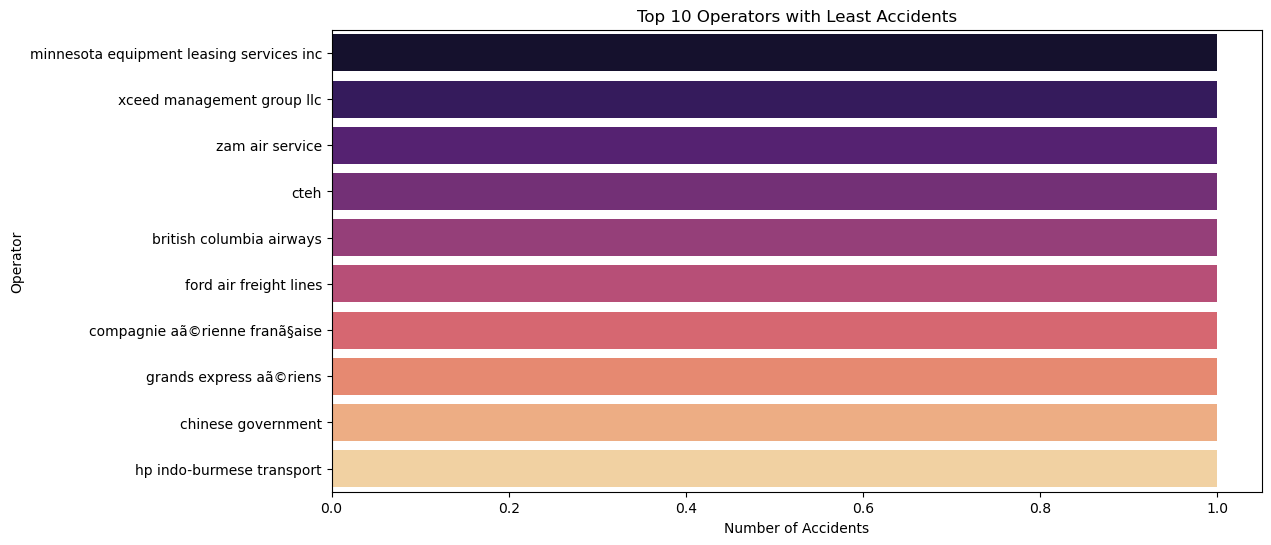

In [431]:
# Top 10 operators by accident count
top_operators = tb["Operator"].value_counts().tail(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_operators.values, y=top_operators.index, palette="magma")
plt.title("Top 10 Operators with Least Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Operator")
plt.show()


### OPERATOR ACCIDENT ANAYLSIS
From the graph we can deduce that mostly non commercial planes are involved in accidents if you compare the ford air freight lines with a usaaf you can see a big difference in the gap so the safest planes to buy are non commercial planes

### Countries with Most Accidents
We will check which countries have recorded the highest number of accidents.


/tmp/ipykernel_7962/1908488194.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


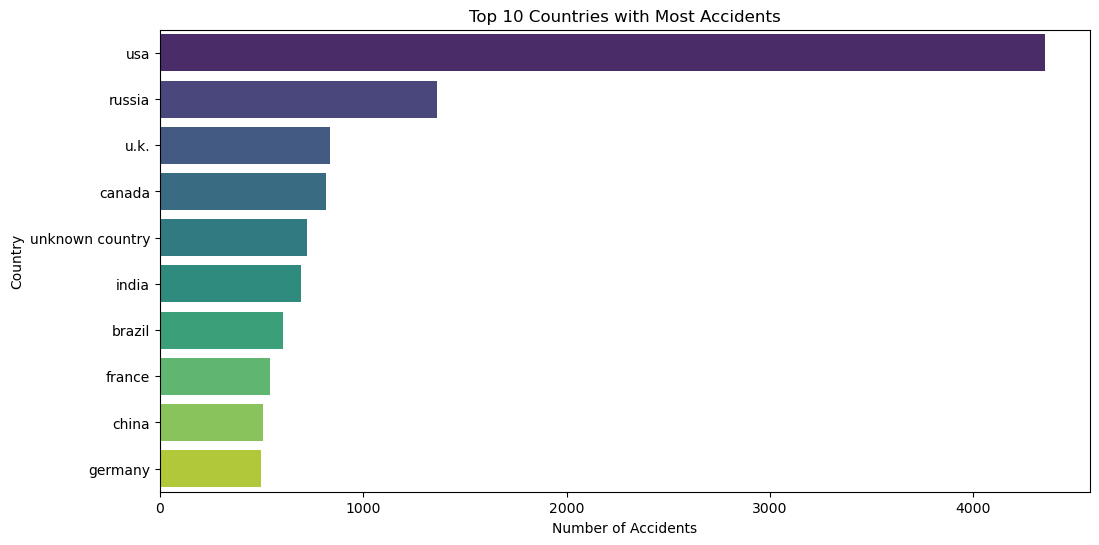

In [432]:
# Top 10 countries by accident count
top_countries = tb["Country"].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries with Most Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Country")
plt.show()


## Countries With Least Accidents


In [ ]:
# Top 10 countries by accident count
top_countries = tb["Country"].value_counts().tail(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries with Least Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Country")
plt.show()


/tmp/ipykernel_7962/1753434603.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


 ### Country accident analysis

 From the graphs we can deduce that the countries where least accidents happen are of a small geographic size compared to the others where most accidents happen for exapmle Monaco and USA.

### Aircraft Types with Most Accidents
We will check which aircraft types have the highest number of accidents.


/tmp/ipykernel_7962/713652138.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_aircraft.values, y=top_aircraft.index, palette="cubehelix")


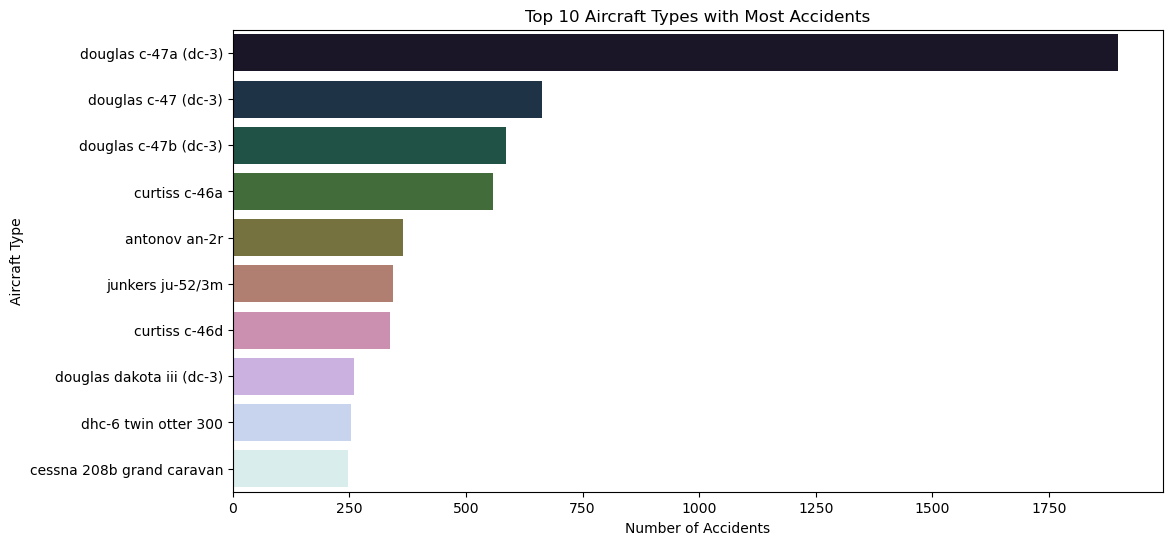

In [394]:
# Top 10 aircraft types by accident count
top_aircraft = tb["Aircraft Type"].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_aircraft.values, y=top_aircraft.index, palette="cubehelix")
plt.title("Top 10 Aircraft Types with Most Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Type")
plt.show()


### Aircraft Types With Least Accidents

/tmp/ipykernel_7962/692812212.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_aircraft.values, y=top_aircraft.index, palette="cubehelix")


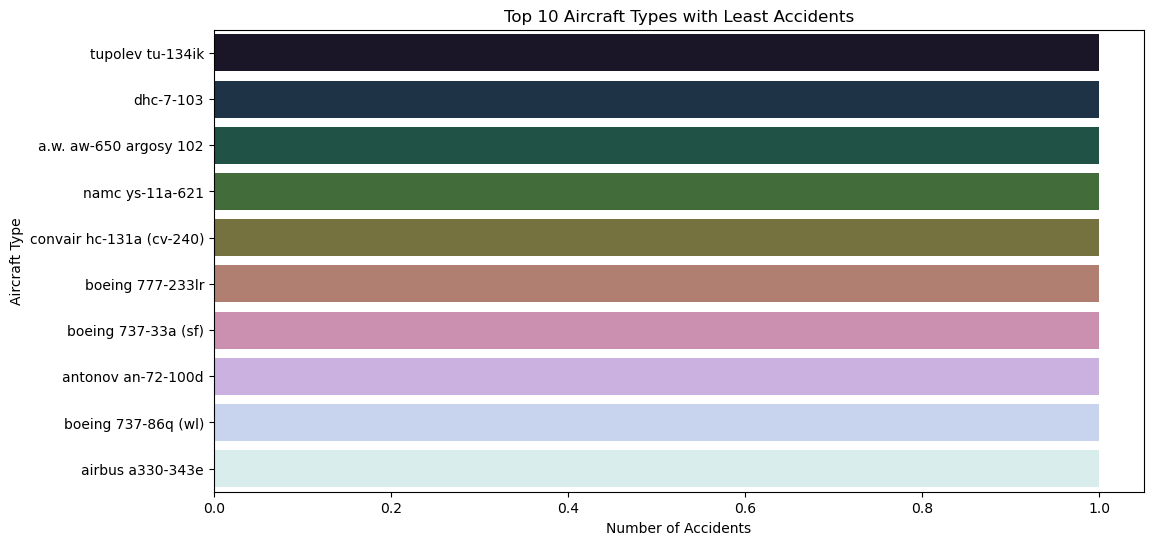

In [395]:
# Top 10 aircraft types by accident count
top_aircraft = tb["Aircraft Type"].value_counts().tail(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_aircraft.values, y=top_aircraft.index, palette="cubehelix")
plt.title("Top 10 Aircraft Types with Least Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Type")
plt.show()

### Aircraft Type Analysis

From the graph we can deduce that the aircrafts with the least number of accidents are actually the large planes including the Boeing and airbus thus leading to the conclusion where by the type of aircraft to be bought should be larger ones

### DOUBLE CHECKING STATE OF DATA(CLEAN OR NOT)
*** checking whether the data is clean or we mmissed some small bits

In [396]:
# check for null values again
tb.isnull().sum()

Date of Accident         0
Aircraft Type            0
Aircraft Registration    0
Operator                 0
Deaths                   0
Location                 0
Country                  0
Category                 0
Year                     0
dtype: int64

In [397]:
# check for duplicates again 
tb.duplicated().sum()

np.int64(0)

In [398]:
# confirm data types whether they are in the correct form
tb.dtypes


Date of Accident         datetime64[ns]
Aircraft Type                    object
Aircraft Registration            object
Operator                         object
Deaths                          float64
Location                         object
Country                          object
Category                         object
Year                              int64
dtype: object

In [ ]:
# check for whitespaces
tb['Country'].unique()[:20]  
tb['Operator'].unique()[:20]


array(['caproni', 'raf', 'handley page transport', 'aeromarine airways',
       'hp indo-burmese transport', 'sneta', 'chinese government',
       'grands express aã©riens', 'air union',
       'compagnie aã©rienne franã§aise', 'sgta', 'imperial airways',
       'deutsche lufthansa', 'klm', 'ford air freight lines',
       'british columbia airways', 'stout air services',
       'spokane airways', 'sunbeam air transport co.', 'texaco'],
      dtype=object)

In [400]:
# save the cleaned dataset and import it in Tableau 
tb.to_csv("cleaned_aviation_data.csv", index=False)


## Final Inferences and Recommendations

### Inferences
- The number of aviation accidents has fluctuated across the years, with spikes in certain decades.  
- Deaths per year also show peaks, with some years recording very high death counts.  
- Countries such as **United States, Russia, Brazil, and India** recorded the highest number of accidents.  
- Operators like **Aeroflot, Air France, and American Airlines** appeared frequently in the top accident records.  
- Aircraft types such as **Douglas DC-3, Boeing 737, and Antonov An-26** were among those most often involved in accidents.  

### Recommendations
1. **Strengthen Safety Regulations:** Countries with high accident rates like the United States and Russia should continue improving safety audits.  
2. **Focus on High-Risk Operators:** Airlines such as Aeroflot and American Airlines should be prioritized for more frequent operational reviews and staff retraining.  
3. **Modernize Aircraft Fleets:** Replace or retire aircraft types like the Douglas DC-3 and Antonov An-26 that appear often in historical accidents.  
4. **Invest in Training:** Expand pilot and crew training programs to minimize human error, which may have contributed to operator-linked accidents.  
5. **Enhance Emergency Response:** Improve rapid response systems in high-risk regions like Brazil and India to reduce fatalities.  
6. **Data Monitoring:** Authorities should continuously track accident trends, particularly for frequently involved aircraft types and high-risk operators.  
